In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# define ODE model
def selkov (x0,t,parameters):
    # parameters
    alpha = parameters['alpha']
    beta  = parameters['beta'] 
    gamma = parameters['gamma'] 
    # vaxiables
    x = x0[0]
    y = x0[1]
    # ODEs
    dxdt = alpha - beta*x*y**2 
    dydt = beta*x*y**2 - gamma*y
    return [dxdt, dydt]

Text(0.5, 1.0, 'phase space')

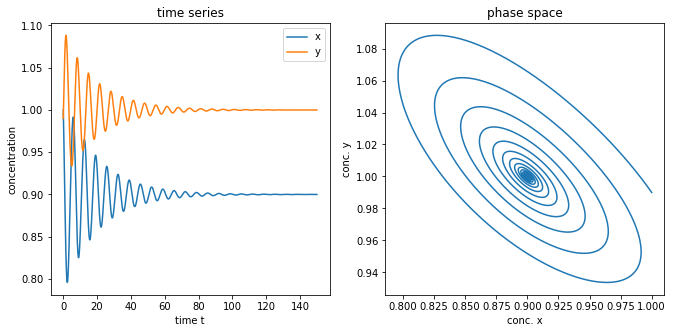

In [3]:
# define time, initial conditions and parameters for integration
t = np.arange(0, 150, 0.01)
x0 = [1, 0.99]
parameters = {'alpha':0.9, 'beta':1, 'gamma':0.9}

# solve ODE model
sol = odeint(selkov, x0, t, args=(parameters,))
x = sol[:,0] 
y = sol[:,1] 

# plot solution 
# subplot 1: time series
fig1 = plt.figure(figsize=(11,5))

ax1 = fig1.add_subplot(121)
ax1.plot(t, x, label='x')
ax1.plot(t, y, label='y')
ax1.legend()
ax1.set_xlabel('time t'); ax1.set_ylabel('concentration')
ax1.set_title('time series')

# subplot 2: phase space 
ax1 = fig1.add_subplot(122)
ax1.plot(x, y)
ax1.set_xlabel('conc. x'); ax1.set_ylabel('conc. y')
ax1.set_title('phase space')

Text(0.5, 1.0, 'phase space')

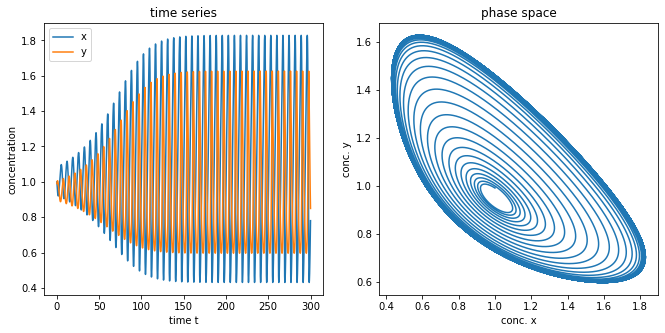

In [4]:
# what happens as gamma is changed gradually?
parameters2 = parameters.copy()
parameters2['gamma'] = 0.95

t2 = np.arange(0, 300, 0.01) #increase the time

# solve ODE model
sol = odeint(selkov, x0, t2, args=(parameters2,))
x = sol[:,0] 
y = sol[:,1] 

# plot solution 
# subplot 1: time series
fig1 = plt.figure(figsize=(11,5))

ax1 = fig1.add_subplot(121)
ax1.plot(t2, x, label='x')
ax1.plot(t2, y, label='y')
ax1.legend()
ax1.set_xlabel('time t'); ax1.set_ylabel('concentration')
ax1.set_title('time series')

# subplot 2: phase space 
ax1 = fig1.add_subplot(122)
ax1.plot(x, y)
ax1.set_xlabel('conc. x'); ax1.set_ylabel('conc. y')
ax1.set_title('phase space')

Text(0.5, 0.98, 'LIMIT CYCLE OSCILLATIONS: different initial conditions are "attracted" to the same cycle\n(limit cycles are ATTRACTORS)')

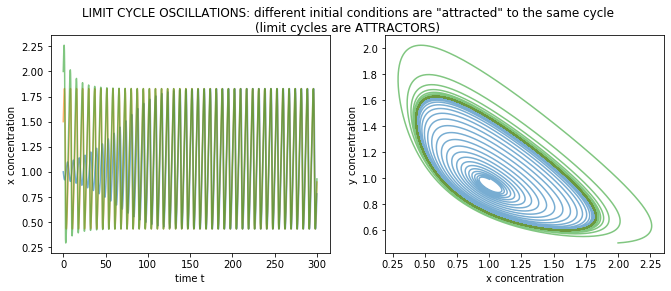

In [5]:
# what happens with different initial conditions? 
x0_1 = [1, 0.99]
x0_2 = [1.5, .6]
x0_3 = [2, 0.5]

sol1 = odeint(selkov, x0_1, t2, args=(parameters2,))
sol2 = odeint(selkov, x0_2, t2, args=(parameters2,))
sol3 = odeint(selkov, x0_3, t2, args=(parameters2,))

x1, y1 = sol1[:,0], sol1[:,1]
x2, y2 = sol2[:,0], sol2[:,1]
x3, y3 = sol3[:,0], sol3[:,1]

# plot 
fig2 = plt.figure(figsize=(11,4))

# subplot 1: concentration of x
ax1 = fig2.add_subplot(121)
ax1.plot(t2, x1, alpha=0.6); ax1.plot(t2, x2, alpha=0.6); ax1.plot(t2, x3, alpha=0.6)
ax1.set_xlabel('time t'); ax1.set_ylabel('x concentration')

# subplot 2: phase portraits for the different solutions 
ax3 = fig2.add_subplot(122)
ax3.plot(x1, y1, alpha=0.6); ax3.plot(x2, y2, alpha=0.6); ax3.plot(x3, y3, alpha=0.6)
ax3.set_xlabel('x concentration'); ax3.set_ylabel('y concentration')

fig2.suptitle('LIMIT CYCLE OSCILLATIONS: different initial conditions are "attracted" to the same cycle\n(limit cycles are ATTRACTORS)')